In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# laod the dataset
data = pd.read_csv('ocd_patient_dataset.csv')

# check the dimension of the dataset
print('Dataset dimension: ', data.shape)

# check the attributes in the dataset
print('Attributes in the dataset: ', data.columns.values)

# view first 5 rows of the dataset
data.head()

Dataset dimension:  (1500, 17)
Attributes in the dataset:  ['Patient ID' 'Age' 'Gender' 'Ethnicity' 'Marital Status'
 'Education Level' 'OCD Diagnosis Date' 'Duration of Symptoms (months)'
 'Previous Diagnoses' 'Family History of OCD' 'Obsession Type'
 'Compulsion Type' 'Y-BOCS Score (Obsessions)'
 'Y-BOCS Score (Compulsions)' 'Depression Diagnosis' 'Anxiety Diagnosis'
 'Medications']


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [5]:
# top level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [6]:
# remove 'Patient ID' from analysis
data.drop(columns=['Patient ID'], axis=1, inplace=True)

# rename columns
data.rename({'Marital Status':'MaritalStatus',
            'Education Level':'EducationLevel',
            'OCD Diagnosis Date':'DiagnosisDate',
            'Duration of Symptoms (months)':'SymptomsDuration',
            'Previous Diagnoses':'PreviousDiagnoses',
            'Family History of OCD':'FamilyHistory',
            'Obsession Type':'ObsessionType',
            'Compulsion Type':'CompulsionType',
            'Y-BOCS Score (Obsessions)':'ObsessionScore',
            'Y-BOCS Score (Compulsions)':'CompulsionScore',
            'Depression Diagnosis':'DepressionDiagnosis',
            'Anxiety Diagnosis':'AnxietyDiagnosis'}, axis=1, inplace=True)

# relocate column 'DiagnosisDate'
diagnosed_date = data.pop('DiagnosisDate')
data.insert(0, 'DiagnosisDate', diagnosed_date)

# convert the data type 'DiagnosisDate' to datetime
data['DiagnosisDate'] = pd.to_datetime(data['DiagnosisDate'], format='%Y-%m-%d')

In [7]:
data.PreviousDiagnoses.unique()

array(['MDD', nan, 'PTSD', 'GAD', 'Panic Disorder'], dtype=object)

In [8]:
data.head()

,DiagnosisDate,Age,Gender,Ethnicity,MaritalStatus,EducationLevel,SymptomsDuration,PreviousDiagnoses,FamilyHistory,ObsessionType,CompulsionType,ObsessionScore,CompulsionScore,DepressionDiagnosis,AnxietyDiagnosis,Medications
0,2016-07-15,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2017-04-28,69,Male,African,Divorced,Some College,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,2018-02-02,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,2014-08-25,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,2022-02-20,56,Female,Hispanic,Married,High School,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# categorical columns
categorical_features = ['Gender', 'Ethnicity', 'MaritalStatus', 'EducationLevel','PreviousDiagnoses','FamilyHistory',
                        'ObsessionType','CompulsionType','DepressionDiagnosis','AnxietyDiagnosis','Medications']

# numeric columns
numeric_features = ['Age', 'SymptomsDuration', 'ObsessionScore', 'CompulsionScore']

# create transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=2))
])

# create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ], remainder='passthrough')

# create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', MinMaxScaler())])

In [10]:
# transform the data
df = data.drop(columns=['DiagnosisDate'], axis=1)
data_processed = pipeline.fit_transform(df)

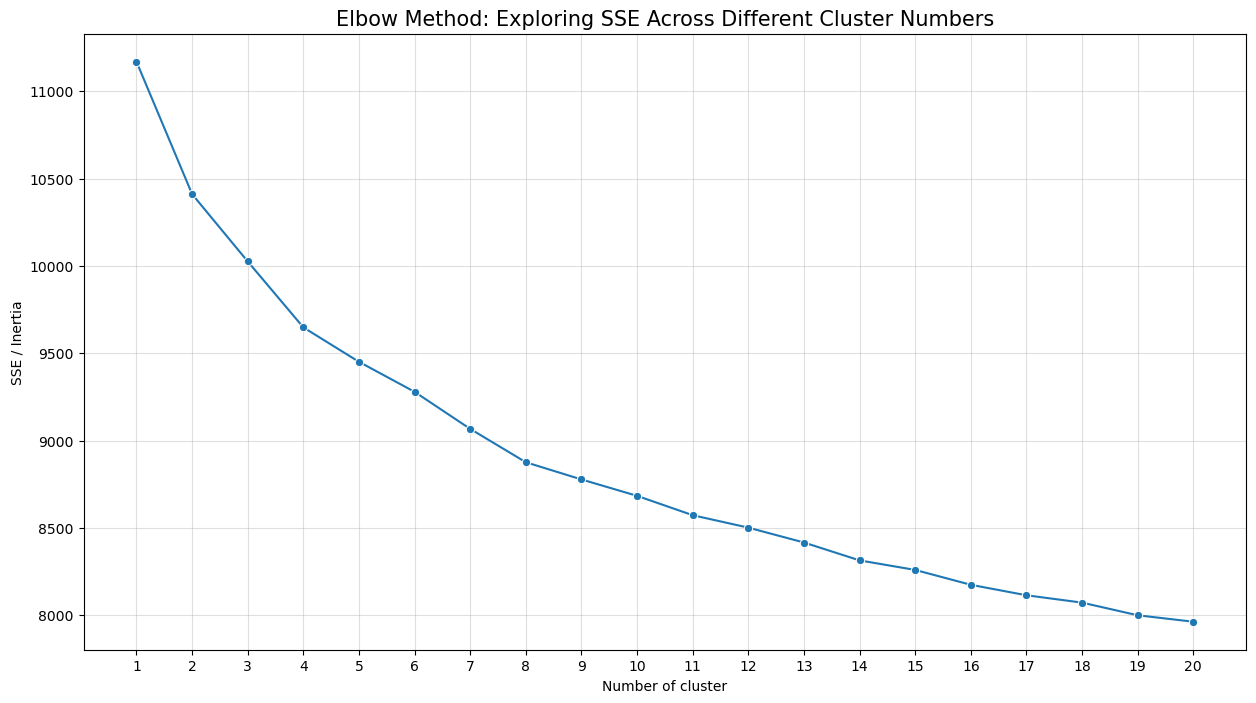

In [11]:
# compute the SSE for cluster range from 1 to 20
from sklearn.cluster import KMeans

sse = []
for k in range(1,21):
    km = KMeans(n_clusters=k, n_init=15, random_state=122)
    km.fit(data_processed)
    sse.append(km.inertia_)
    
res = pd.DataFrame({'Cluster':range(1,21), 'SSE':sse})
# visualize the SSE of different k value
plt.figure(figsize=(15,8))
sns.lineplot(data=res, x=res['Cluster'], y=res['SSE'], marker='o')
plt.xticks(range(1,21))
plt.xlabel('Number of cluster')
plt.ylabel('SSE / Inertia')
plt.title('Elbow Method: Exploring SSE Across Different Cluster Numbers', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

In [12]:
km4 = KMeans(n_clusters=4, n_init=15, random_state=122)
km4.fit(data_processed)

KMeans(n_clusters=4, n_init=15, random_state=122)

In [13]:
# check the number of customer in each classes
km4.labels_
patientLabel = pd.Series(km4.labels_)
patientLabel.value_counts().sort_index()

0    386
1    375
2    374
3    365
Name: count, dtype: int64

In [14]:
# insert a new column 'Cluster' into the dataset
# this column contains the Cluster number of each patient assigned using the K-means partitional clustering
data['Cluster'] = patientLabel

# view the first 5 rows of the data with new column inserted
data.head()

,DiagnosisDate,Age,Gender,Ethnicity,MaritalStatus,EducationLevel,SymptomsDuration,PreviousDiagnoses,FamilyHistory,ObsessionType,CompulsionType,ObsessionScore,CompulsionScore,DepressionDiagnosis,AnxietyDiagnosis,Medications,Cluster
0,2016-07-15,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,1
1,2017-04-28,69,Male,African,Divorced,Some College,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,0
2,2018-02-02,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,3
3,2014-08-25,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,0
4,2022-02-20,56,Female,Hispanic,Married,High School,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN,2


C:\Users\shivh\AppData\Local\Temp\ipykernel_19292\2358956954.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['Cluster'], y=data['Age'], palette=colors, ax=axes[1])


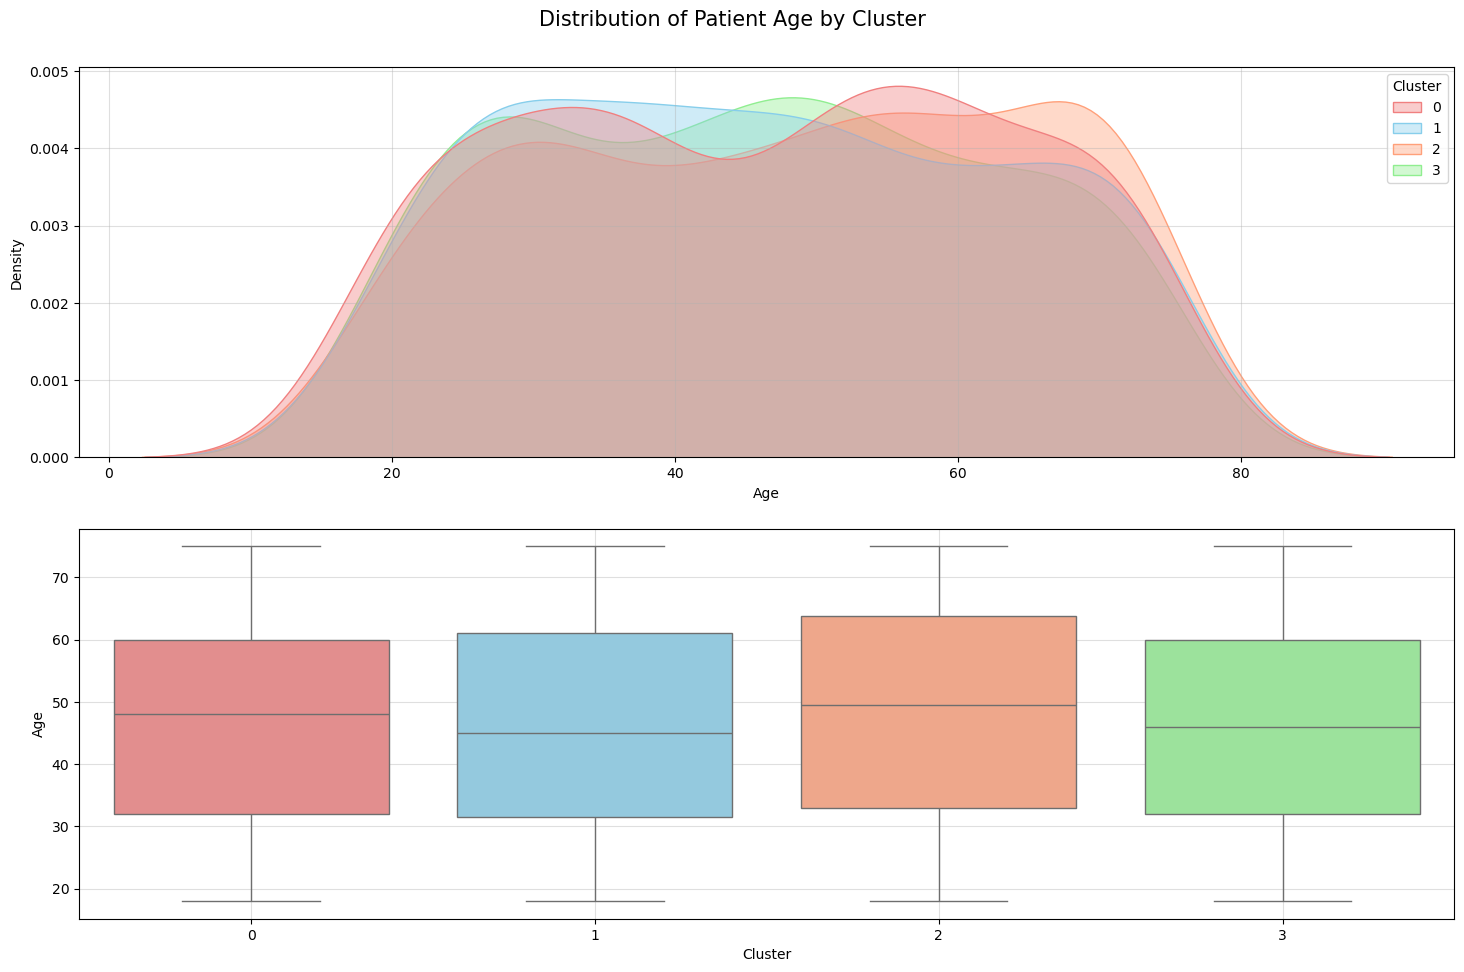

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,386.0,46.593264,16.979372,18.0,32.0,48.0,60.00,75.0
1,375.0,46.280000,16.734766,18.0,31.5,45.0,61.00,75.0
2,374.0,48.219251,17.088950,18.0,33.0,49.5,63.75,75.0
3,365.0,46.021918,16.479410,18.0,32.0,46.0,60.00,75.0


In [15]:
# distribution of patient age in each cluster
colors = ['lightcoral','skyblue','lightsalmon','lightgreen']

figure, axes = plt.subplots(2,1, figsize=(15,10))
sns.kdeplot(data=data, x=data['Age'], hue=data['Cluster'], palette=colors, fill=True, alpha=0.4, ax=axes[0])
axes[0].grid(alpha=0.4)
sns.boxplot(data=data, x=data['Cluster'], y=data['Age'], palette=colors, ax=axes[1])
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of Patient Age by Cluster', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

# display the summary statistic
pt_cluster = data.groupby('Cluster')
display(pt_cluster.Age.describe())

C:\Users\shivh\AppData\Local\Temp\ipykernel_19292\4146603632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['Cluster'], y=data['SymptomsDuration'], palette=colors, ax=axes[1])


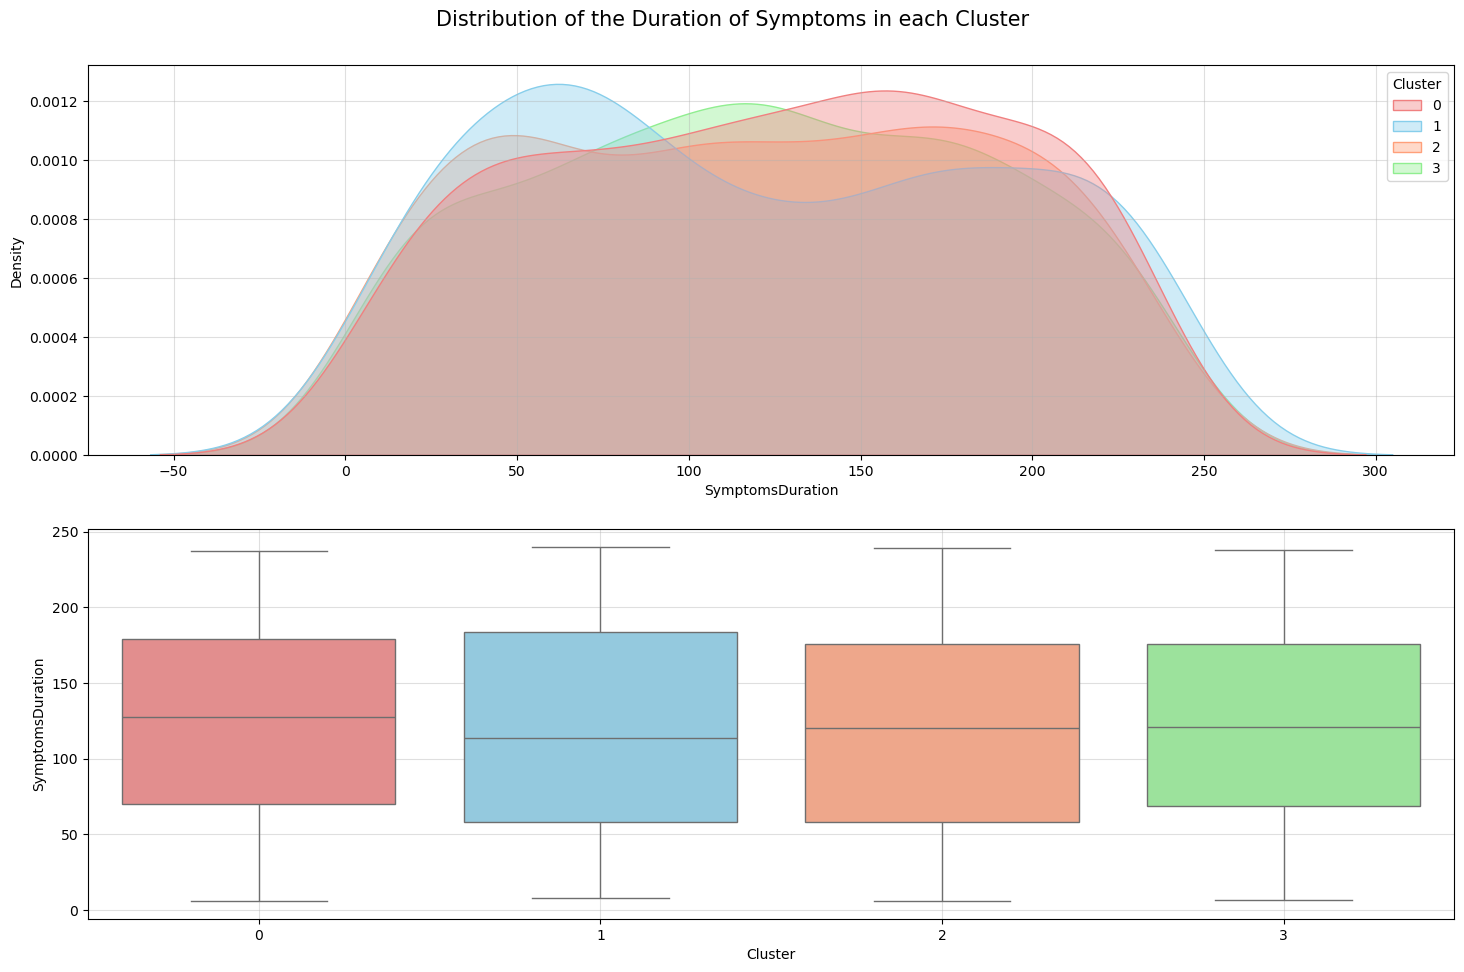

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,386.0,125.176166,65.895668,6.0,70.00,127.5,179.0,237.0
1,375.0,119.832000,70.721084,8.0,58.50,114.0,183.5,240.0
2,374.0,120.000000,67.444069,6.0,58.25,120.0,176.0,239.0
3,365.0,121.871233,65.559489,7.0,69.00,121.0,176.0,238.0


In [16]:
# distribution of duration of the symptoms in each cluster
figure, axes = plt.subplots(2,1, figsize=(15,10))
sns.kdeplot(data=data, x=data['SymptomsDuration'], hue=data['Cluster'], palette=colors, fill=True, alpha=0.4, ax=axes[0])
axes[0].grid(alpha=0.4)
sns.boxplot(data=data, x=data['Cluster'], y=data['SymptomsDuration'], palette=colors, ax=axes[1])
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of the Duration of Symptoms in each Cluster', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

# display the summary statistic
pt_cluster = data.groupby('Cluster')
display(pt_cluster.SymptomsDuration.describe())

C:\Users\shivh\AppData\Local\Temp\ipykernel_19292\687620275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['Cluster'], y=data['ObsessionScore'], palette=colors, ax=axes[1])


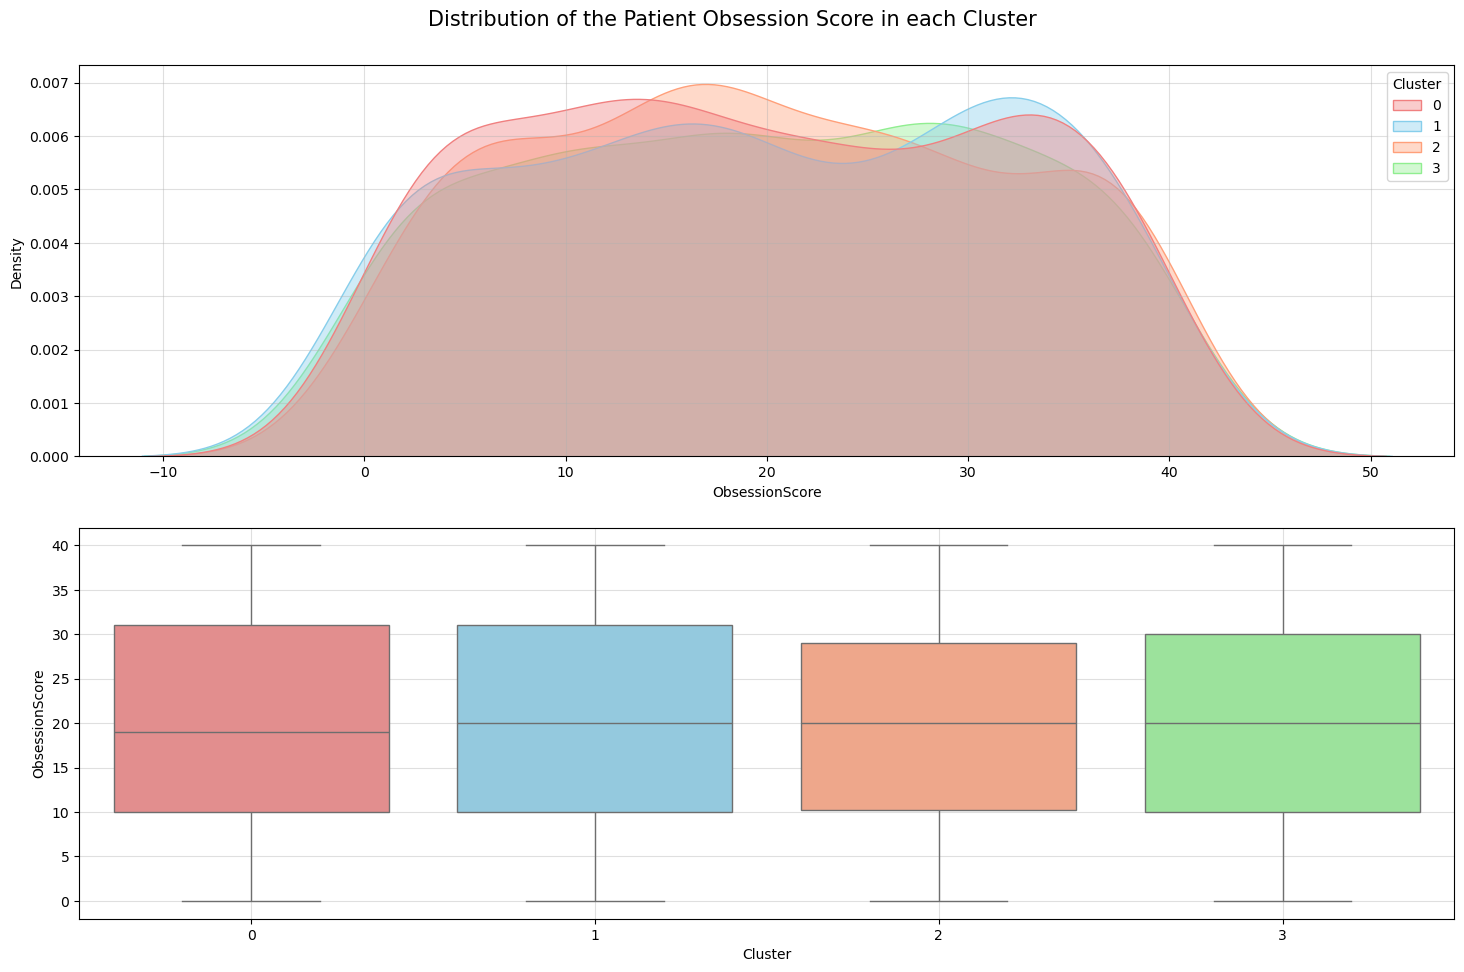

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,386.0,19.880829,11.814422,0.0,10.00,19.0,31.0,40.0
1,375.0,20.136000,12.062678,0.0,10.00,20.0,31.0,40.0
2,374.0,20.101604,11.597603,0.0,10.25,20.0,29.0,40.0
3,365.0,20.079452,11.862617,0.0,10.00,20.0,30.0,40.0


In [17]:
# distribution of the patient obsession score in each cluster
figure, axes = plt.subplots(2,1, figsize=(15,10))
sns.kdeplot(data=data, x=data['ObsessionScore'], hue=data['Cluster'], palette=colors, fill=True, alpha=0.4, ax=axes[0])
axes[0].grid(alpha=0.4)
sns.boxplot(data=data, x=data['Cluster'], y=data['ObsessionScore'], palette=colors, ax=axes[1])
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of the Patient Obsession Score in each Cluster', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

# display the summary statistic
pt_cluster = data.groupby('Cluster')
display(pt_cluster.ObsessionScore.describe())

C:\Users\shivh\AppData\Local\Temp\ipykernel_19292\1378688420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['Cluster'], y=data['CompulsionScore'], palette=colors, ax=axes[1])


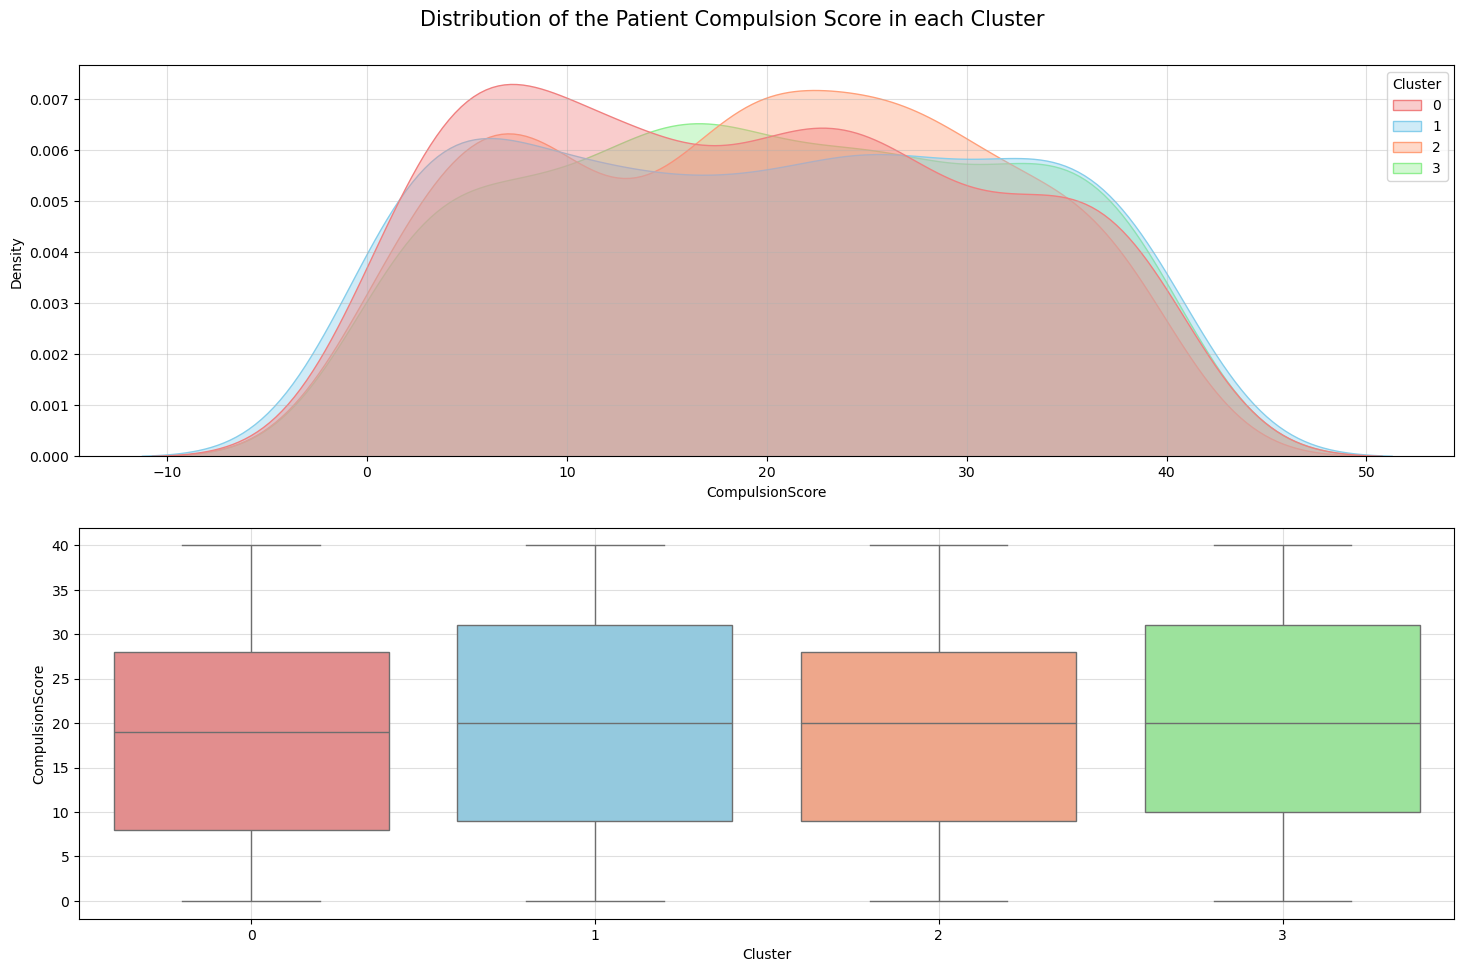

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,386.0,18.945596,11.820064,0.0,8.0,19.0,28.0,40.0
1,375.0,19.674667,12.295200,0.0,9.0,20.0,31.0,40.0
2,374.0,19.625668,11.331656,0.0,9.0,20.0,28.0,40.0
3,365.0,20.295890,11.667090,0.0,10.0,20.0,31.0,40.0


In [18]:
# distribution of the patient obsession score in each cluster
figure, axes = plt.subplots(2,1, figsize=(15,10))
sns.kdeplot(data=data, x=data['CompulsionScore'], hue=data['Cluster'], palette=colors, fill=True, alpha=0.4, ax=axes[0])
axes[0].grid(alpha=0.4)
sns.boxplot(data=data, x=data['Cluster'], y=data['CompulsionScore'], palette=colors, ax=axes[1])
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of the Patient Compulsion Score in each Cluster', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

# display the summary statistic
pt_cluster = data.groupby('Cluster')
display(pt_cluster.CompulsionScore.describe())

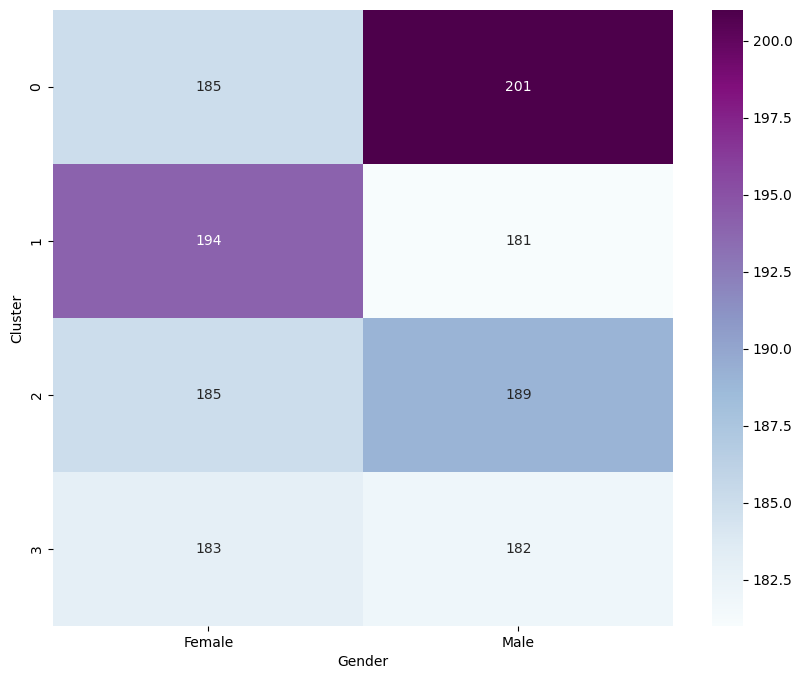

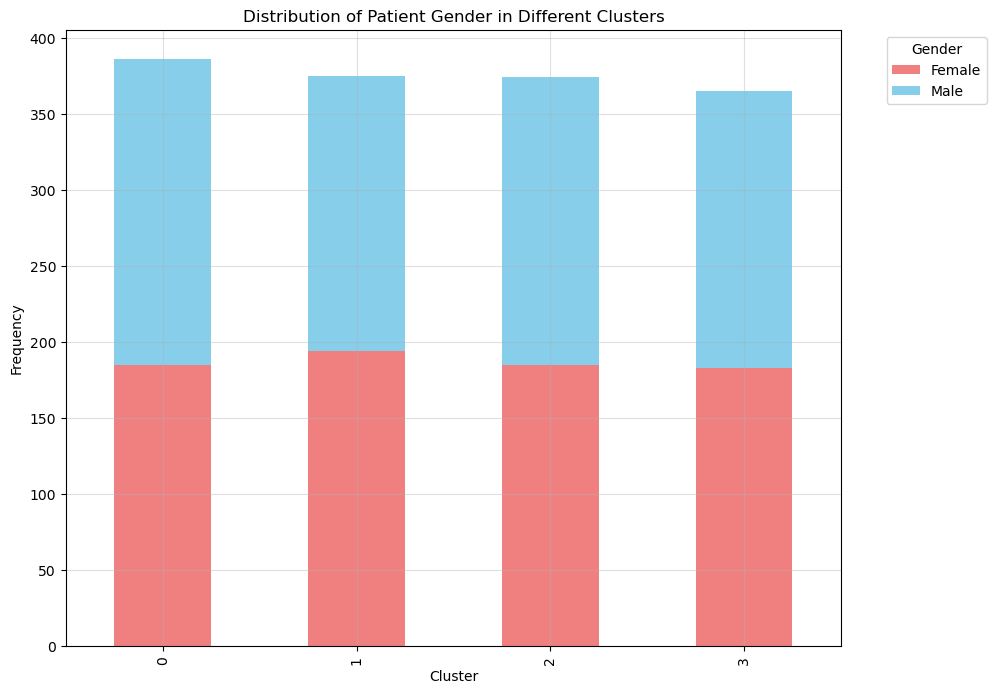

In [19]:
# distribution of patient's gender in each cluster
gender_crosstab = pd.crosstab(data['Cluster'], data['Gender'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(gender_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
gender_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Gender in Different Clusters')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()

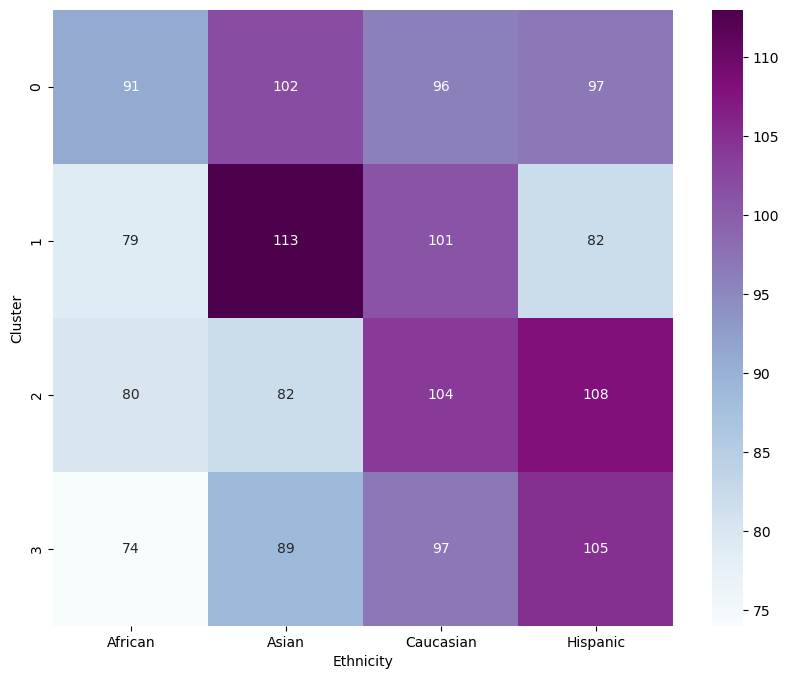

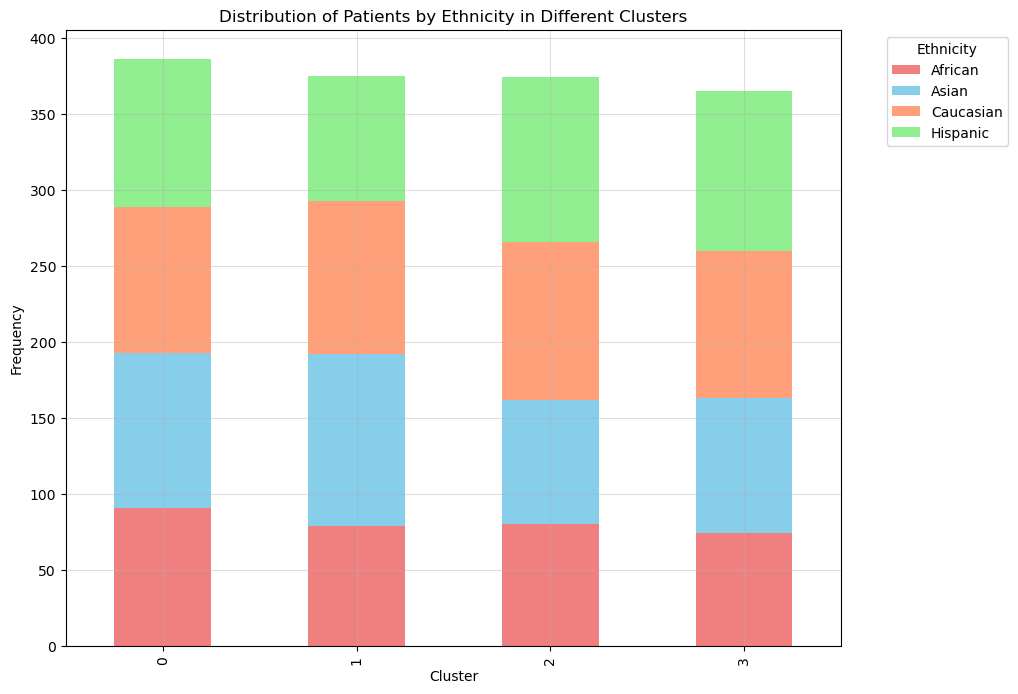

In [20]:
# distribution of patient's ethnicity in each cluster
ethnic_crosstab = pd.crosstab(data['Cluster'], data['Ethnicity'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(ethnic_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
ethnic_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patients by Ethnicity in Different Clusters')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()

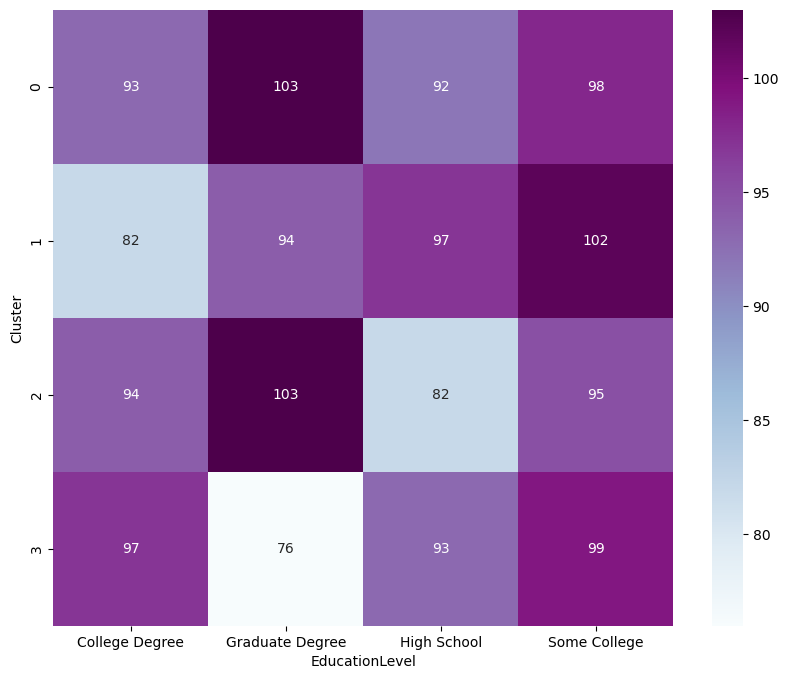

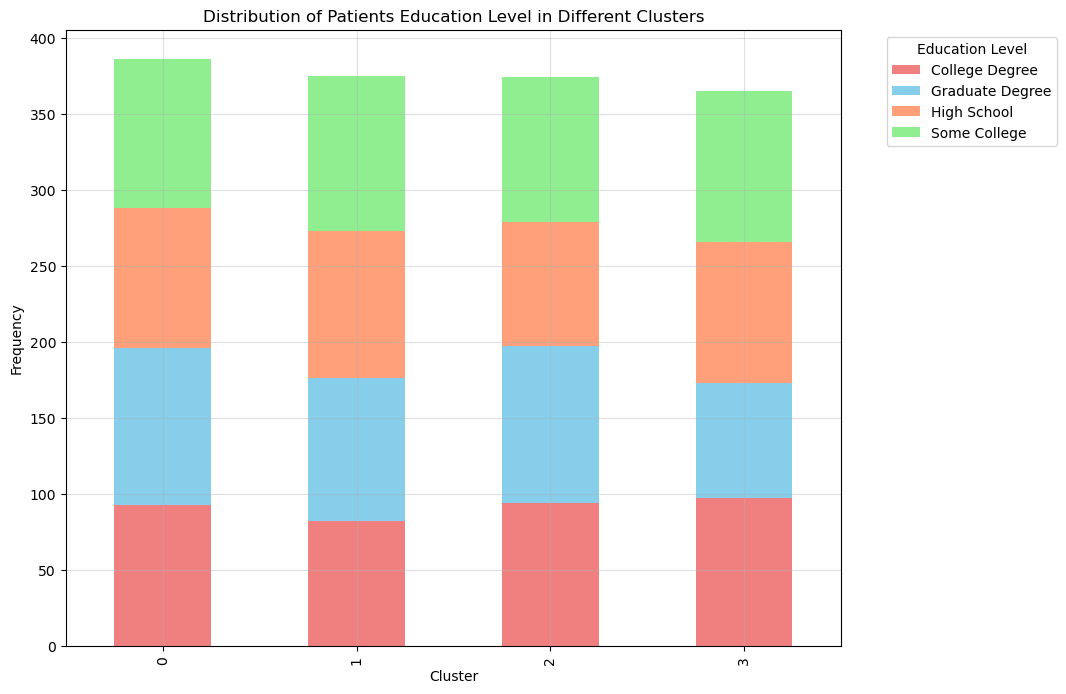

In [21]:
# distribution of patient's education level in each cluster
educ_crosstab = pd.crosstab(data['Cluster'], data['EducationLevel'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(educ_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
educ_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patients Education Level in Different Clusters')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()

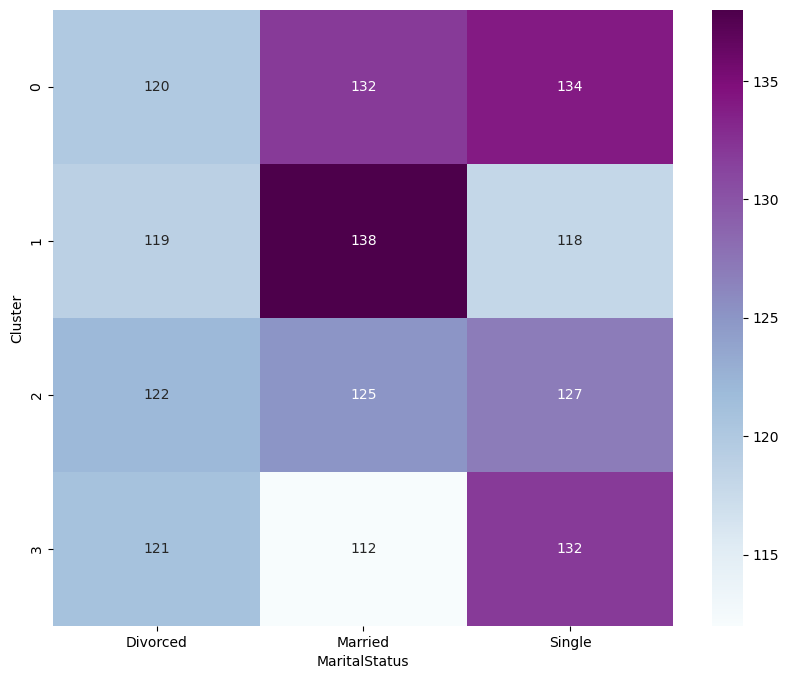

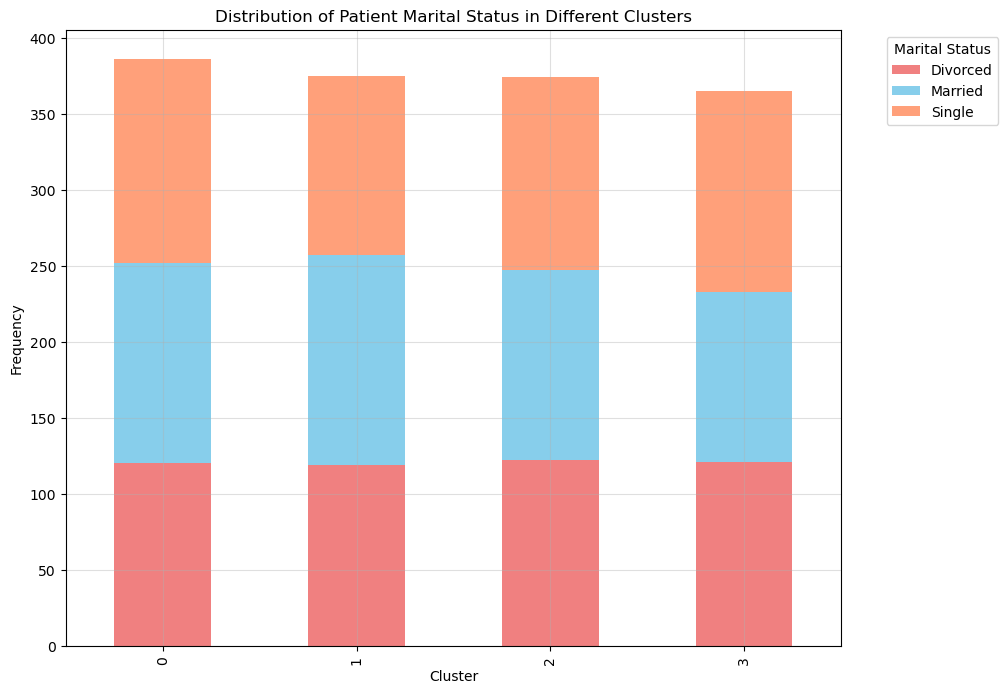

In [22]:
# distribution of patient's gender in each cluster
marital_crosstab = pd.crosstab(data['Cluster'], data['MaritalStatus'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(marital_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
marital_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Marital Status in Different Clusters')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()

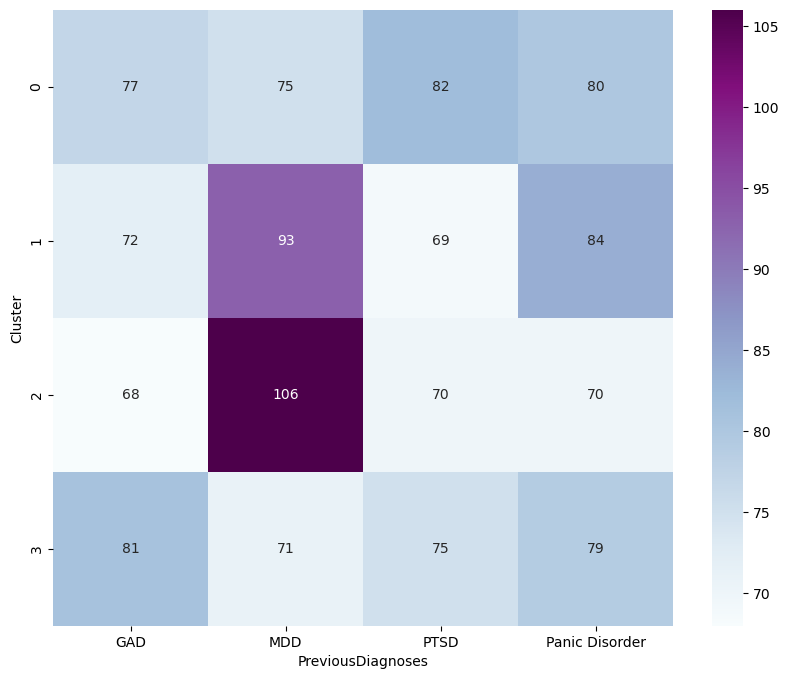

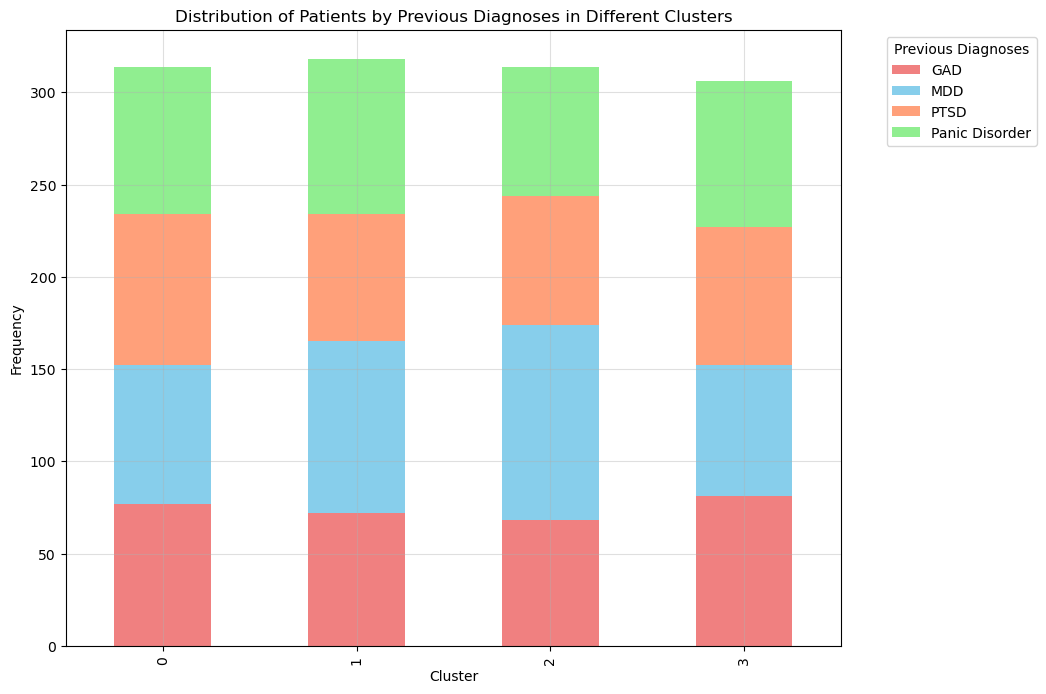

In [23]:
colors = ['lightcoral','skyblue','lightsalmon','lightgreen', 'violet']

# distribution of various previous diagnoses in each cluster
diagnose_crosstab = pd.crosstab(data['Cluster'], data['PreviousDiagnoses'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(diagnose_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
diagnose_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patients by Previous Diagnoses in Different Clusters')
plt.legend(title='Previous Diagnoses', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()

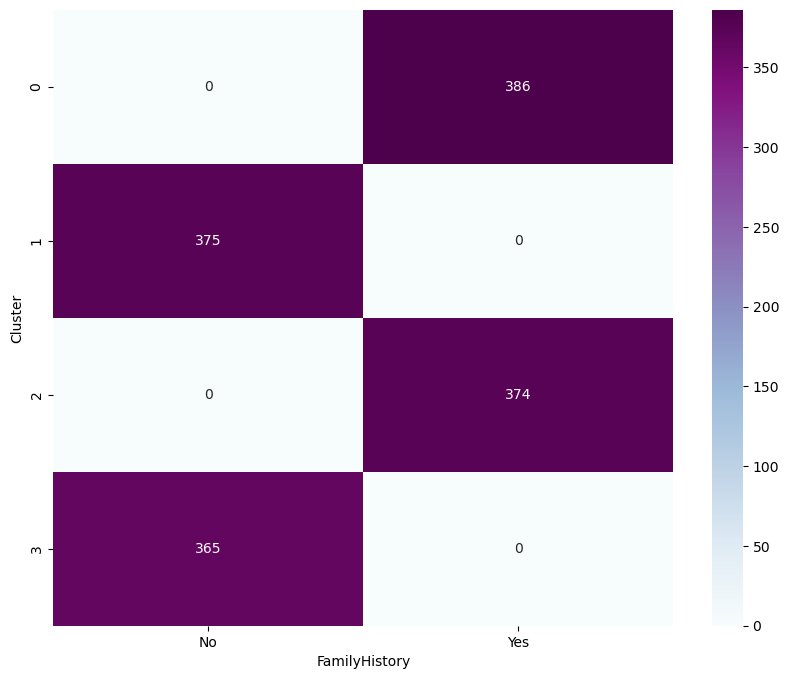

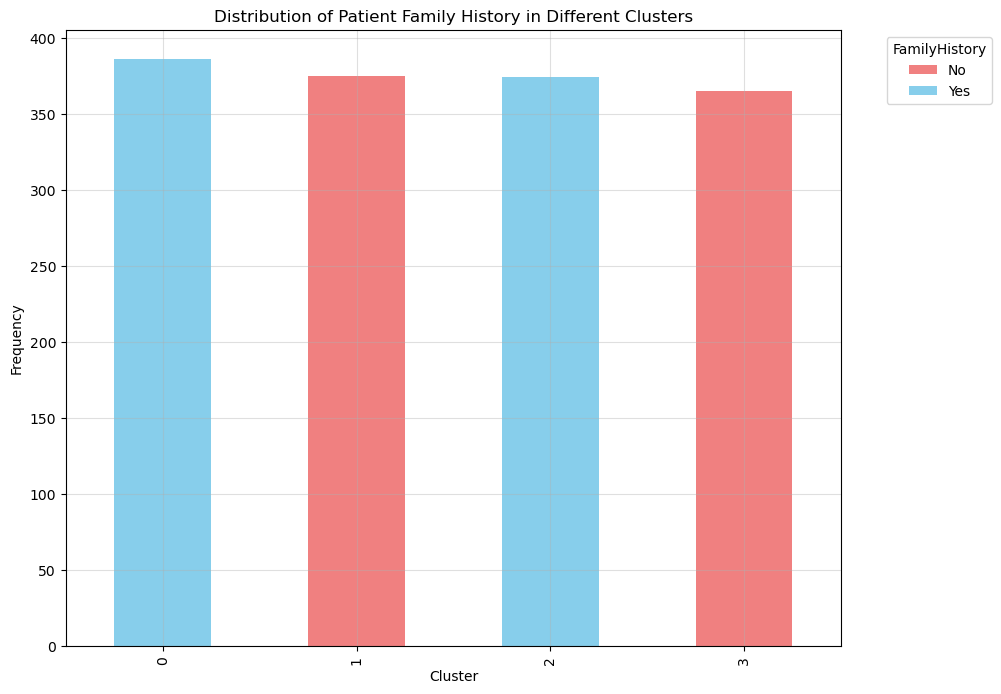

In [24]:
# distribution of patient's family history in each cluster
history_crosstab = pd.crosstab(data['Cluster'], data['FamilyHistory'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(history_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
history_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Family History in Different Clusters')
plt.legend(title='FamilyHistory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()

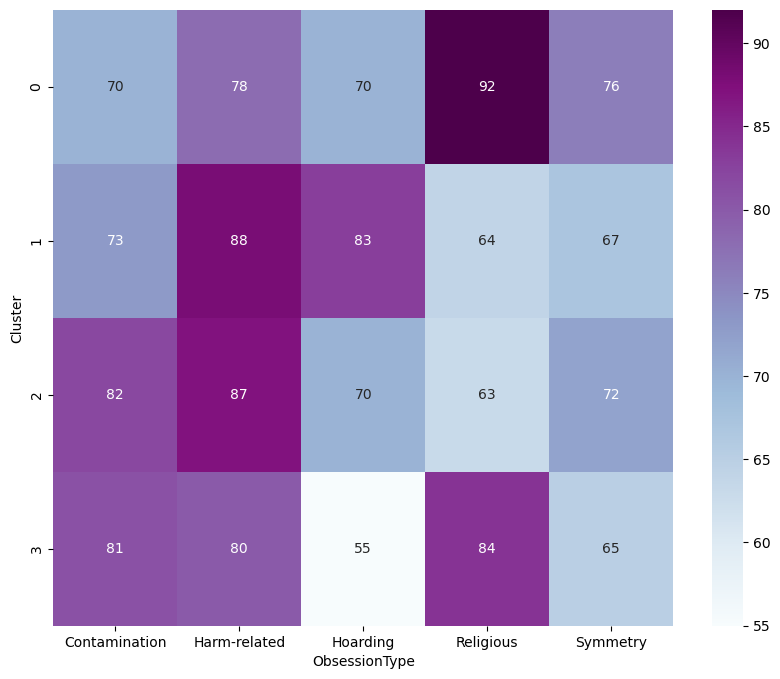

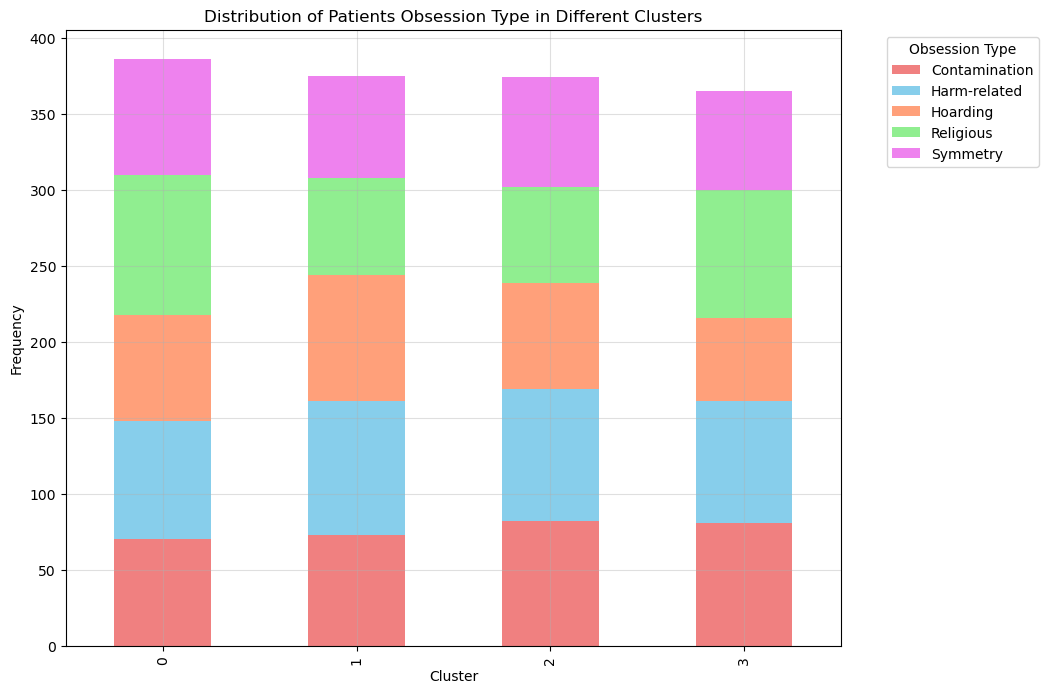

In [25]:
# distribution of patient's obsession type in each cluster
obsession_crosstab = pd.crosstab(data['Cluster'], data['ObsessionType'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(obsession_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
obsession_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patients Obsession Type in Different Clusters')
plt.legend(title='Obsession Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()

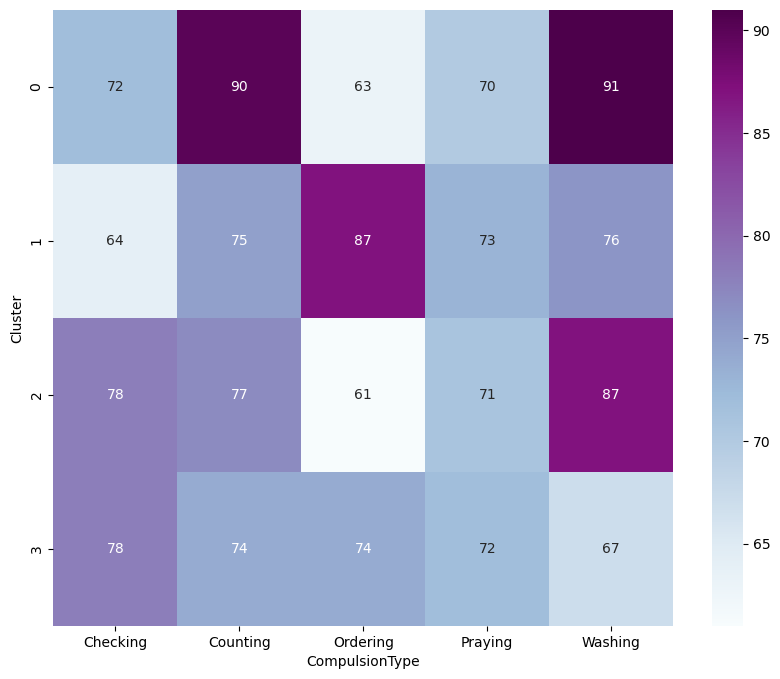

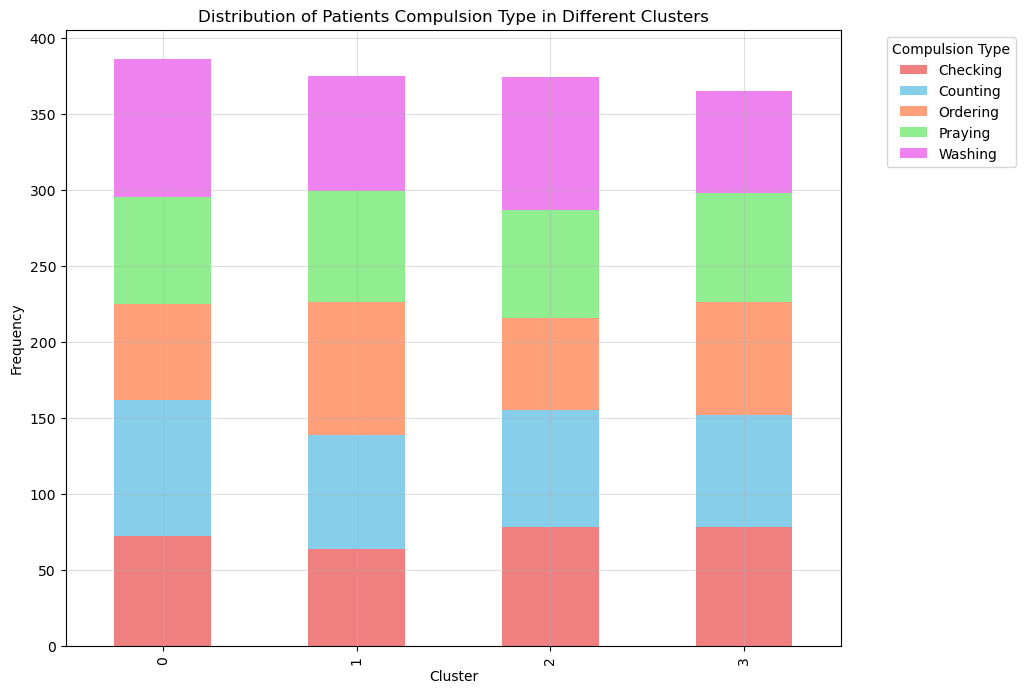

In [26]:
# distribution of patient's compulsion type in each cluster
compulsion_crosstab = pd.crosstab(data['Cluster'], data['CompulsionType'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(compulsion_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
compulsion_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patients Compulsion Type in Different Clusters')
plt.legend(title='Compulsion Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()

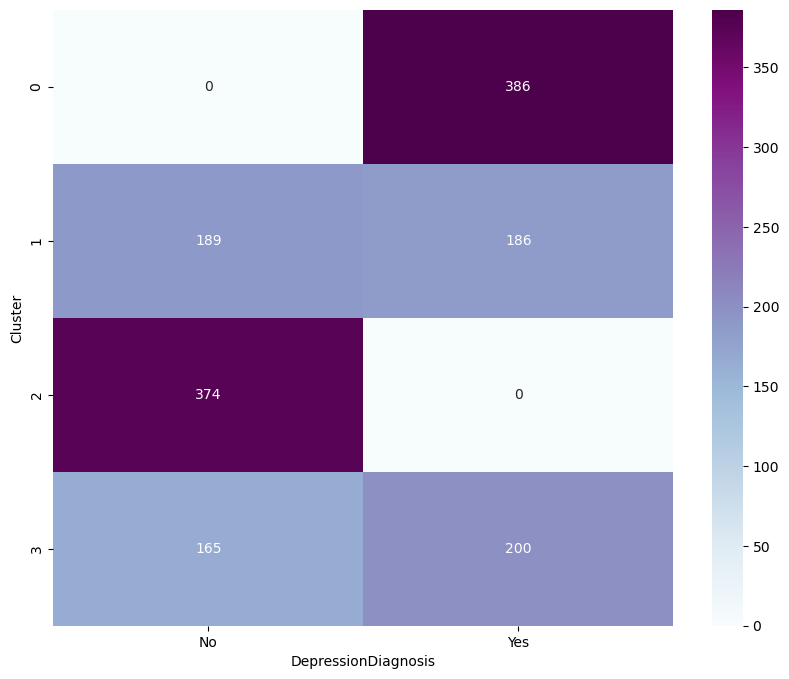

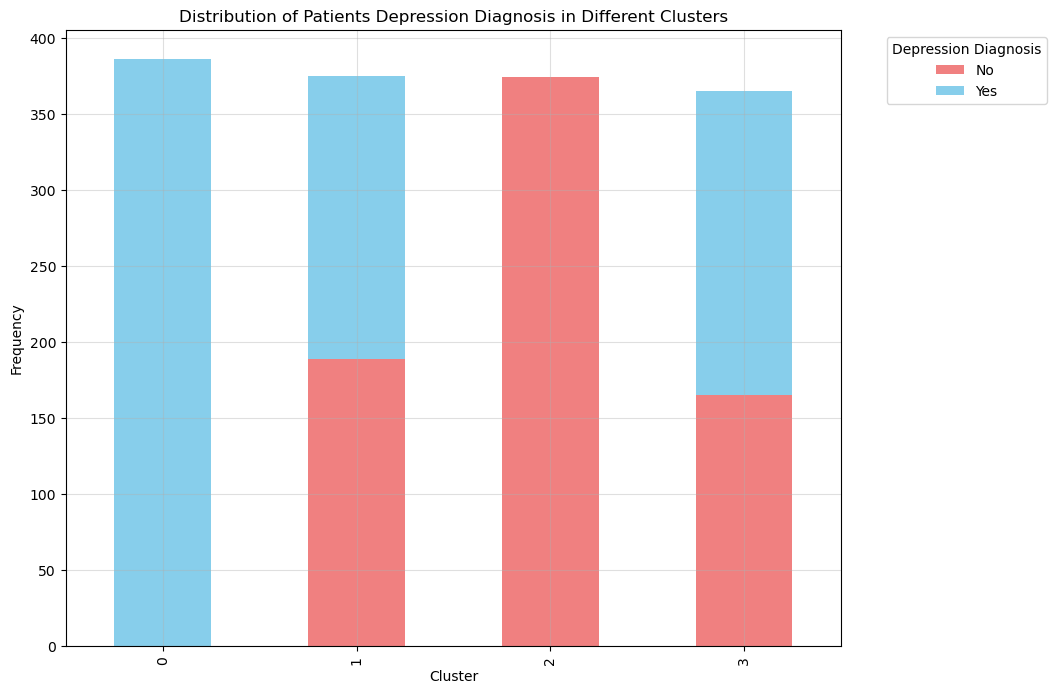

In [27]:
# distribution of patient's depression diagnosis in each cluster
depression_crosstab = pd.crosstab(data['Cluster'], data['DepressionDiagnosis'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(depression_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
depression_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patients Depression Diagnosis in Different Clusters')
plt.legend(title='Depression Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()

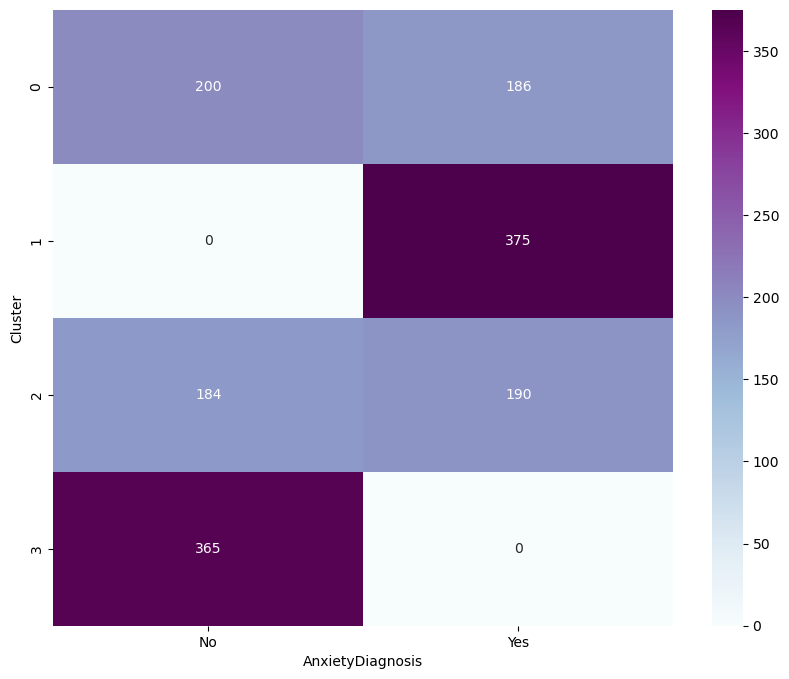

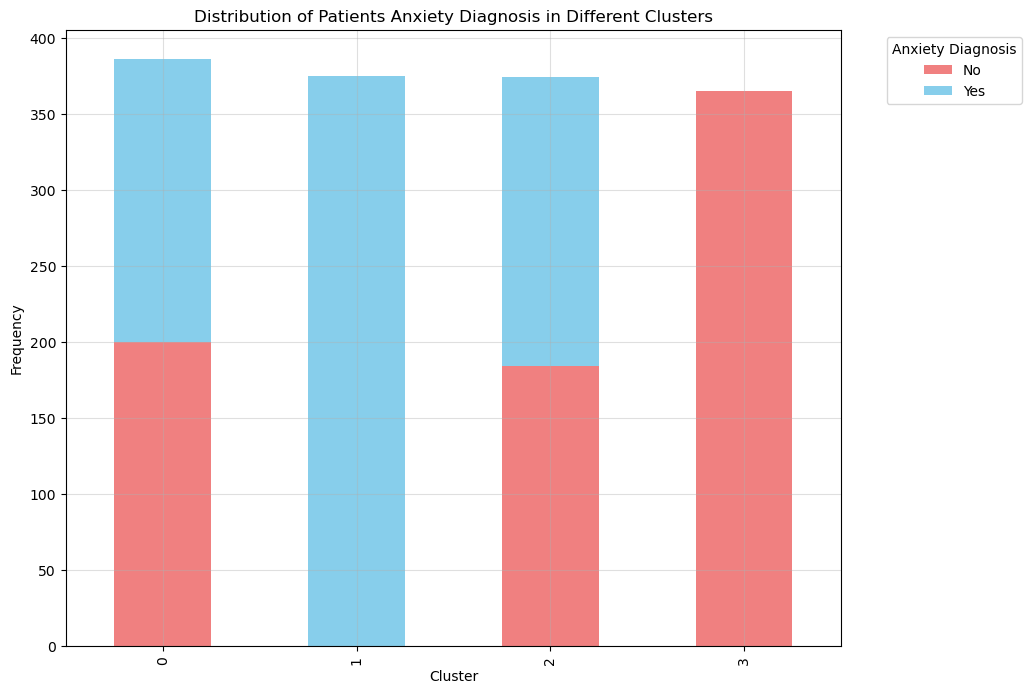

In [28]:
# distribution of patient's anxiety diagnosis in each cluster
anxiety_crosstab = pd.crosstab(data['Cluster'], data['AnxietyDiagnosis'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(anxiety_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
anxiety_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patients Anxiety Diagnosis in Different Clusters')
plt.legend(title='Anxiety Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()

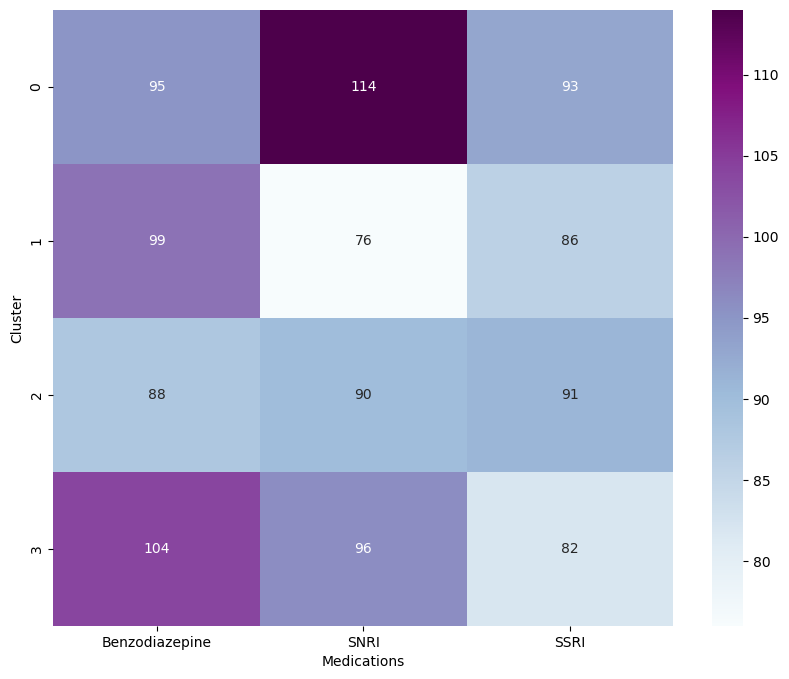

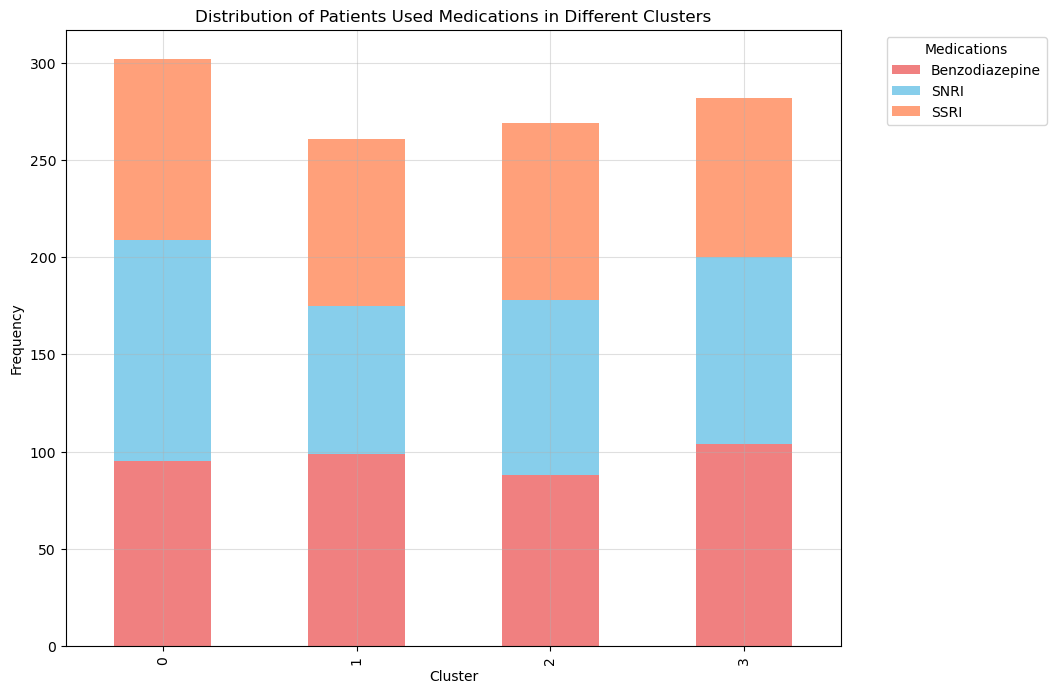

In [29]:
# distribution of patient's used medication in each cluster
medication_crosstab = pd.crosstab(data['Cluster'], data['Medications'])

# display the cross table in heatmap
plt.figure(figsize=(10,8))
sns.heatmap(medication_crosstab, annot=True, fmt='.4g', cmap='BuPu')
plt.show()

# visalization (stacked bar chart)
medication_crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(10,8))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Patients Used Medications in Different Clusters')
plt.legend(title='Medications', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.show()